### (A) Dependencies

In [1]:
import matplotlib.pyplot as plt
import PIL
import re
import os

os.system("pip install pytesseract")
os.system("sudo apt install tesseract-ocr")

import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
os.environ['TESSDATA_PREFIX'] = TESSDATA_PREFIX = "/usr/share/tesseract-ocr/4.00/tessdata/"

%matplotlib inline

In [5]:
!unzip Examples.zip

Archive:  Examples.zip
   creating: Examples/
  inflating: Examples/OCR_test_image.png  


# (B) Implementing

## Util Functions

In [6]:
import requests

base_dir = "https://github.com/tesseract-ocr/tessdata/raw/main/"#"https://github.com/tesseract-ocr/tessdata/blob/main/"
valid_langs = ['eng', 'ara', 'ell', 'ces', 'chi_sim', 'chi_tra', 'deu', 'fra', 'ita', 'jpn', 'kor', 'nld', 'por', 'rus', 'spa', 'tur']

def prepare_path(lang, base=base_dir, valid_langs=valid_langs):
  
  # Checking the params
  if lang not in valid_langs: raise "It is not valid language"
  
  # preparing the requeits
  url = f"{base_dir}{lang}.traineddata"
  req_url = f"{url}?raw=true"
  return url, req_url

def download_required_language(lang, TESSDATA_PREFIX=TESSDATA_PREFIX):
  
  required_file = f"{lang}.traineddata"
  
  # if it is not alread installed, download it.
  if required_file not in os.listdir(TESSDATA_PREFIX):
      try:
        # Prepare the corresponding configuration downloading path
        url, req_url = prepare_path(lang)
        
        # add the new language into local
        dst = os.path.join(TESSDATA_PREFIX, required_file)
        with open(dst, "wb") as f:
          f.write(requests.get(url).content)

      except Exception as e:
        print(f"Be sure lang param is valid,\nerror:{e}")
  else:
    print(f"{lang} package has already installed")
      

## Implementation

In [3]:
os.listdir(TESSDATA_PREFIX)

['configs', 'pdf.ttf', 'tessconfigs', 'osd.traineddata', 'eng.traineddata']

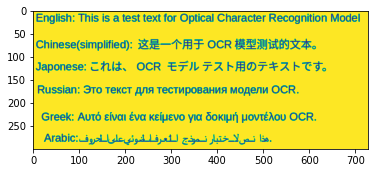

In [7]:
ex_img = PIL.Image.open('Examples/OCR_test_image.png').convert('L')
plt.imshow(ex_img);

In [8]:
lang = "ell" # greek
download_required_language(lang)
text = pytesseract.image_to_string(ex_img, lang=lang)
print(text)

Επα[ίδη: Τηῖς Ι5 ἃ ἱθοί [θχί [ογ Ορϊοα! ΟΠαΓαοίθγ βθοοαπίοη ΜοαθΙ

 

 

 

 

ΟΠΙπεδο(θΙπηρΙΠθα): Μ α---Τ. οο ΕΠς
ὕαροπεςς: ' ΠΙᾶ. ΟΟΕΣ ΕΤΙΤΖΡΕΗΡΩΦΞΞΕΑΕΓΤ.

 

 

 

 

 

 

 

Ευμδείαη: Ότο τθΚοΤ ή τθοτηροβδημἃ ΜομΕπΙ ΟΟΗΕ.

 

 

ΟΓθεκ: Αυτό εἶναι ένα κείµενο για δοκιµή µοντέλου ΟΟΒ.

Αγαβίο:. ὁ .ά { ς ο α | ὁ, «] | σ Α α .



# (3) Demo App

In [9]:
import matplotlib.pyplot as plt
import PIL
import re
import os

if os.system("pip freeze | grep gradio==") != 0: os.system("pip install gradio")
if os.system("pip freeze | grep pytesseract==") != 0: os.system("pip install pytesseract")
if os.system("pip freeze | grep tesseract-ocr==") != 0: os.system("sudo apt install tesseract-ocr")

import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
os.environ['TESSDATA_PREFIX'] = TESSDATA_PREFIX = "/usr/share/tesseract-ocr/4.00/tessdata/"

%matplotlib inline

In [28]:
if not os.path.exists("Examples"):
  !unzip Examples.zip

Archive:  Examples.zip
   creating: Examples/
  inflating: Examples/OCR_test_image.png  


In [29]:
def prepare_path(lang, base=base_dir, valid_langs=valid_langs):
  
  # Checking the params
  if lang not in valid_langs: raise "It is not valid language"
  
  # preparing the requeits
  url = f"{base_dir}{lang}.traineddata"
  req_url = f"{url}?raw=true"
  return url, req_url

def download_required_language(lang, TESSDATA_PREFIX=TESSDATA_PREFIX):
  
  required_file = f"{lang}.traineddata"
  
  # if it is not alread installed, download it.
  if required_file not in os.listdir(TESSDATA_PREFIX):
      try:
        # Prepare the corresponding configuration downloading path
        url, req_url = prepare_path(lang)
        
        # add the new language into local
        dst = os.path.join(TESSDATA_PREFIX, required_file)
        with open(dst, "wb") as f:
          f.write(requests.get(url).content)
        
        return f"{lang} package has installed successfully"
      except Exception as e:
        return f"Be sure lang param is valid,\nerror:{e}"
    
  else:
    return f"{lang} package has already installed"


In [30]:
def ocr_implement(img, lang):
  
  try:
    # pre-process to easy read
    processed_img = img.convert('L')
    test = pytesseract.image_to_string(img, lang=lang )
  except Exception as e:
        return f"Be sure lang param is valid,\nerror:{e}"

  return test

In [31]:
import gradio as gr

# supported languages
valid_langs = ['eng', 'ara', 'ces', 'chi_sim', 'chi_tra', 'deu', 'fra', 'ita', 'jpn', 'kor', 'nld', 'por', 'rus', 'spa', 'tur', 'rus']

with gr.Blocks() as demo:
    img = gr.Image(type="pil", source="upload")
    lang  = gr.Dropdown(choices=valid_langs, value="eng", label="Language")
    with gr.Row():
        extract_btn = gr.Button("Extract text form image")
        install_lang = gr.Button("install language")
    output = gr.Textbox()


    # connecting the button functions
    extract_btn.click(ocr_implement, inputs=[img, lang], outputs=output)
    install_lang.click(download_required_language, inputs=lang, outputs=output)

    # setting the exmples
    gr.Examples("Examples", img)

In [32]:
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>